In [4]:
import numpy as np
from scipy.integrate import odeint
import scipy.stats as stats

%matplotlib inline 
import matplotlib.pyplot as plt

import math
import statsmodels.api as sm            # for autocorrelation function
import os
import seaborn as sns


In [51]:
rain = 10*np.sin(np.linspace(0, 10, 300))+10
rain = 0*np.sin(np.linspace(0, 10, 300))
rain[0:60]=np.concatenate((np.linspace(0, 1, 30),np.linspace(1, 0, 30)))

temp = 10*np.sin(np.linspace(0, 1, 300))+10
temp[temp<0]=0
swe = 10*np.sin(np.linspace(0, 1, 300))+10
sweb = swe
sweb[sweb>0]=1

In [82]:
import random
random.seed(10)

par = [0.5,1, 1800,0.02,0.01,0.00]

n =300
x = 0*np.ones([n,200])


dt = 0.1  # Time step.
T = 30.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.


for j in range(199):
    for i in range(n - 1):
        x[i + 1,j] = x[i,j] + 1*rain[i]*dt + 0*par[1]*sweb[i]*temp[i]*dt -1/par[0]*x[i,j]*dt + \
        1*(np.sqrt(par[3])*x[i,j]+np.sqrt(par[4])*rain[i])*np.random.normal(0,np.sqrt(dt),1)+ \
        np.sqrt(par[5])*np.random.lognormal(0,np.sqrt(dt),1)
sim = 1/par[0]*par[2]*x


In [83]:
discharge = sim[:,3]

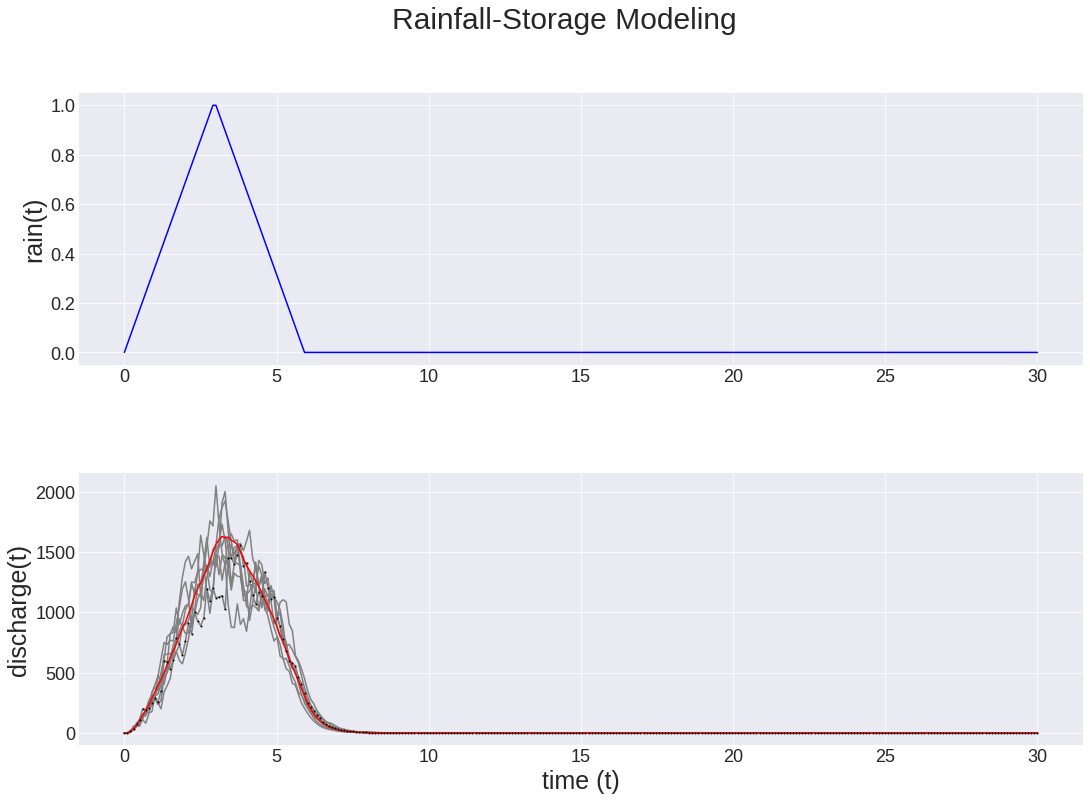

In [84]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(2,figsize=(18, 12))
fig.suptitle('Rainfall-Storage Modeling', fontsize =30)
fig.subplots_adjust(hspace = 0.4)

ax[0].plot(t, rain, color='blue')
ax[1].plot(t,sim[:,2:10], color = 'gray')
ax[1].plot(t,sim.mean(axis=1), color = 'red')
ax[1].plot(t,discharge, 'k.', markersize = 2 )

#ax[0].set_ylim([0,2])
ax[0].set_xlabel('', fontsize = 25)
ax[0].set_ylabel('rain(t)', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=18)

#ax[1].set_ylim([0,4])
ax[1].set_xlabel('time (t)', fontsize = 25)
ax[1].set_ylabel('discharge(t)', fontsize = 25)
#ax[1].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[1].tick_params(axis='both', which='major', labelsize=18)

fig.savefig('SDE_test2.jpg',dpi = 150)